In [1]:
## '슬라이딩 윈도우'(Sliding Window)란 고정 사이즈의 윈도우가 이동하면서 
## 윈도우 내에 있는 데이터를 이용해 문제를 풀이하는 알고리즘을 말한다.

## 기존 알고리즘 책에는 나오지 않지만 이처럼 여기서 별도의 장을 할애해 설명하는 이유는
## 투 포인터(7장 참조) 와 함께 슬라이딩 윈도우는 알고리즘 문제 풀이에 매우 유용하게 사용되는 중요한 기법이기 때문이다.

## 투 포인터와 비슷하지만 이와 구분하기 위해 일반적으로 고정 사이즈 윈도우를 사용하는 경우를 
## 슬라이딩 윈도우로 따로 구분하기도 한다.
## 또한, 주로 정렬된 배열을 대상으로 하는 투 포인터와 달리 슬라이딩 윈도우는 정렬 여부에 관계 없이 활용된다는 차이가 있다.

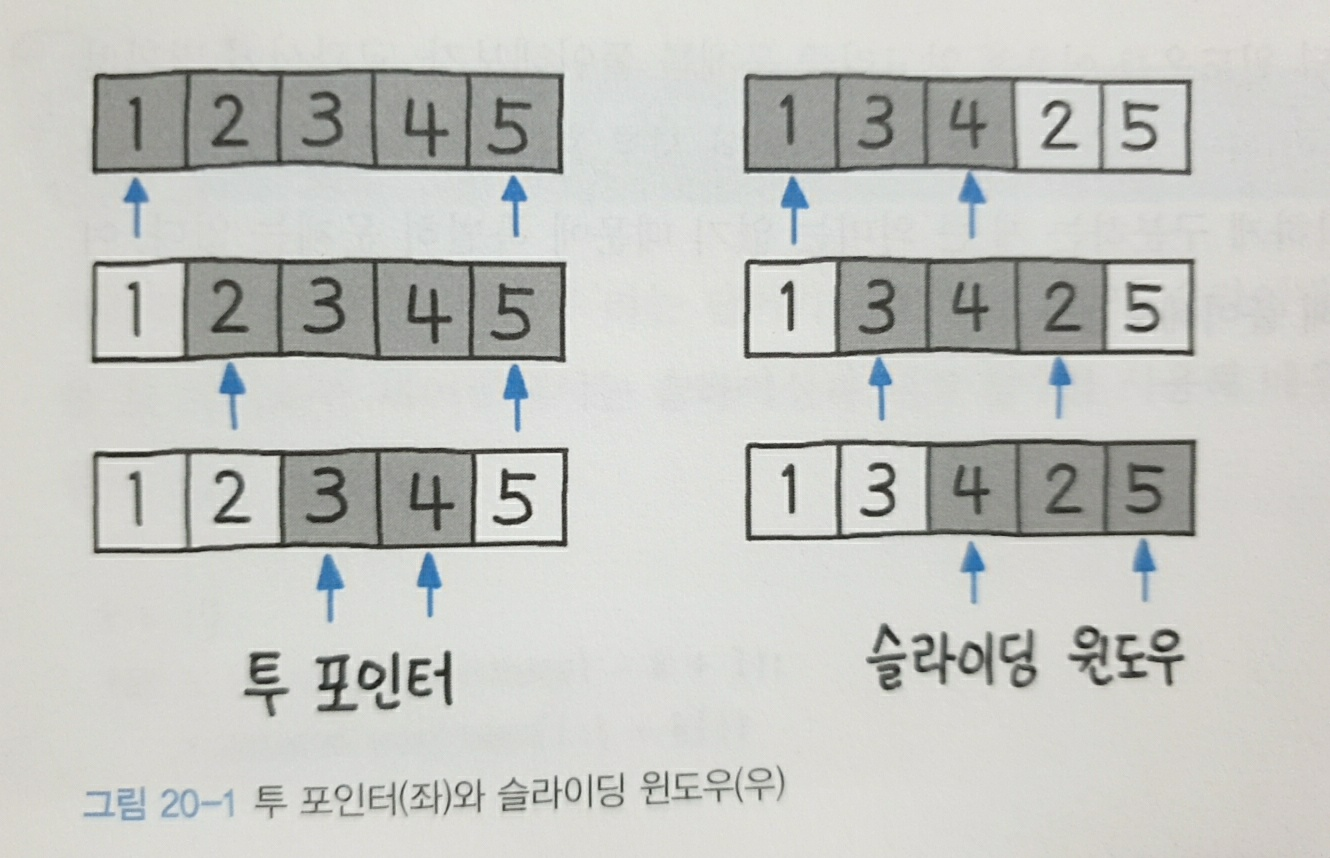

In [2]:
from IPython.display import Image

Image('그림20-1.jpg', width="400")

In [3]:
## 그림 20-1에서 좌측 그림의 투 포인터는 주로 정렬된 배열을 대상으로 한다.
## 윈도우의 사이즈가 가변적이며 좌우 포인터가 자유롭게 이동할 수 있는 방식이다.

## 반면, 슬라이딩 윈도우는 정렬되어 있지 않은 배열에도 적용할 수 있다.
## 윈도우 사이즈는 고정이며, 좌 또는 우 한쪽 방향으로만 이동한다.

## 둘의 특징을 표 20-1에 정리했다.

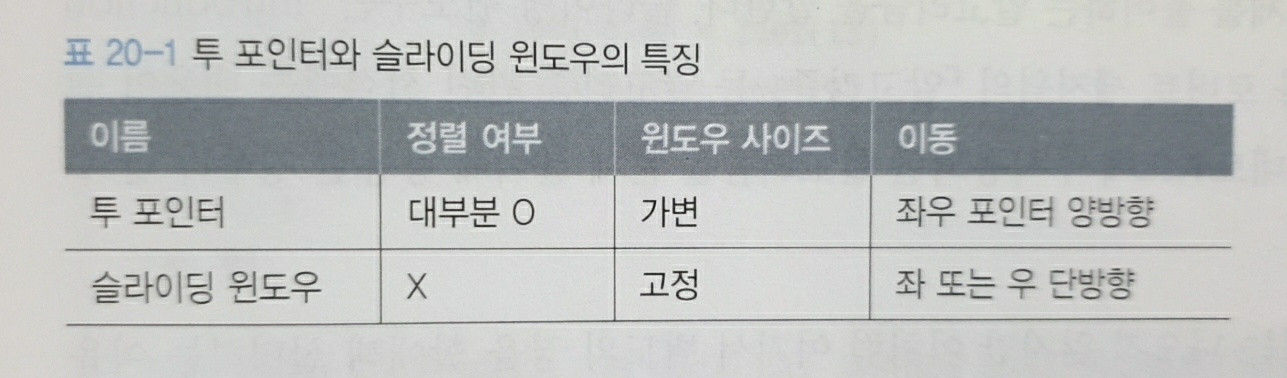

In [4]:
from IPython.display import Image

Image('표20-1.jpg', width="500")

In [5]:
## 슬라이딩 윈도우는 2개의 네트워크 호스트 간의 패킷 흐름을 제어하기 위한 방법을 지칭하는 네트워크 용어이기도 하다.
## 네트워크에서 패킷을 전송할 때 고정 사이즈의 윈도우가 옆으로 옆으로 이동하면서 그다음 패킷들을 전송하는 방식을 말한다.

# 75. 최대 슬라이딩 윈도우

### LeetCode 239. Sliding Windows Maximum

##### 배열 nums가 주어졌을 때 k 크기의 슬라이딩 윈도우를 오른쪽 끝까지 이동하면서 최대 슬라이딩 윈도우를 구하라.

In [6]:
## 예제 1
    ## input: nums = [1, 3, -1, -3, 5, 3, 6, 7], k = 3
    ## output: [3, 3, 5, 5, 6, 7]

```
- 설명

    윈도우 포지션                  최대
   -------------------         ------------
   [1 3 -1] -3 5 3 6 7             3
   1 [3 -1 -3] 5 3 6 7             3
   1 3 [-1 -3 5] 3 6 7             5
   1 3 -1 [-3 5 3] 6 7             5
   1 3 -1 -3 [5 3 6] 7             6
   1 3 -1 -3 5 [3 6 7]             7 
```

##### 풀이 1 브루트 포스로 계산

In [7]:
## 슬라이딩 윈도우를 우측으로 움직여 가며 max()로 최댓값을 추출한다.
## 매번 윈도우의 최댓값을 계산하기 때문에 이 경우 시간 복잡도는 O(n)이다.

In [8]:
from typing import *

def maxSlidingWindow(nums: List[int], k: int) -> List[int]:
    if not nums:
        return nums
    
    r = []
    for i in range(len(nums) - k + 1):
        r.append(max(nums[i:i + k]))
        
    return r

In [9]:
nums = [1, 3, -1, -3, 5, 3, 6, 7]
k = 3

maxSlidingWindow(nums, k)

[3, 3, 5, 5, 6, 7]

##### 풀이 2 큐를 이용한 최적화

In [10]:
## 좀 더 최적화 할 수 있는 방법이 있을 것 같다.
## 어차피 슬라이딩 윈도우를 한 칸씩 움직여야 하는 부분은 개선이 어렵다.
## 그렇다면 max()를 계산하는 부분에서 최적화를 할 수 있지 않을까?
## 정렬되지 않은 슬라이딩 윈도우에서 최댓값을 추출하려면 어떠한 알고리즘이든 결국 한 번 이상은 봐야 하기 때문에,
## 최댓값 계산을 O(n) 이내로 줄일 수 있는 방법이 없다.
## 따라서 가급적 최댓값 계산을 최소화하기 위해 이전의 최댓값을 저장해뒀다가 한 칸씩 이동할 때 
## 새 값에 대해서만 더 큰 값인지 확인하고, 최댓값이 윈도우에서 빠지게 되는 경우에만 
## 다시 전체를 계산하는 형태로 개선한다면, 계산량을 줄일 수 있을 것 같다.
## FIFO 형태로 풀이할 수 있기 때문에, 큐를 사용한다.

In [11]:
import collections

def maxSlidingWindow(nums: List[int], k: int) -> List[int]:
    results = []
    window = collections.deque()
    current_max = float('-inf') # 아직 최댓값이 반영된 상태가 아님
    
    for i, v in enumerate(nums):
        window.append(v)
        if i < k - 1:
            continue
            
        # 새로 추가된 값이 기존 최댓값보다 큰 경우 교체
        if current_max == float('-inf'):
            current_max = max(window)
        elif v > current_max:
            current_max = v
            
        results.append(current_max)
        
        # 최댓값이 윈도우에서 빠지면 초기화
        if current_max == window.popleft():
            current_max = float('-inf')
            
    return results

In [12]:
nums = [1, 3, -1, -3, 5, 3, 6, 7]
k = 3

maxSlidingWindow(nums, k)

[3, 3, 5, 5, 6, 7]

In [13]:
## 실행 속도는 전과 비교해 5배가량 빨라졌다.

# 76. 부분 문자열이 포함된 최소 윈도우

### LeetCode 76. Minimum Window Substring

##### 문자열 S와 T를 입력받아 O(n)에 T의 모든 문자가 포함된 S의 최소 윈도우를 찾아라.

In [14]:
## 예제 1
    ## input: S = "ADOBECODEBANC", T = "ABC"
    ## output: "BANC"

##### 풀이 1 모든 윈도우 크기를 브루트 포스로 탐색

In [15]:
## 먼저 브루트 포스로 풀어보자. 
## 최소 윈도우라고 했으니 일단 T의 크기부터 시작해 점점 크기를 키워가며 모든 윈도우 크기에 대해 탐색을 시도해볼 수 있겠다.
## 이렇게 하면 T 문자열을 가장 먼저 찾게 되는 윈도우 사이즈가 정답이 된다.
## 그러나 이 문제에는 시간 복잡도 O(n) 제한이 있다.
## 이 풀이 경우 O(n^2) 이므로 이렇게 풀이해선 안 된다.

In [16]:
def minWindow(s: str, t: str) -> str:
    def contains(s_substr_lst: List, t_lst: List):
        for t_elem in t_lst:
            if t_elem in s_substr_lst:
                s_substr_lst.remove(t_elem)
            else:
                return False
        return True
    
    if not s or not t:
        return ''
    
    window_size = len(t)
    
    for size in range(window_size, len(s) + 1):
        for left in range(len(s) - size + 1):
            s_substr = s[left:left + size]
            if contains(list(s_substr), list(t)):
                return s_substr
    
    return ''

In [17]:
S = "ADOBECODEBANC"
T = "ABC"

minWindow(S, T)

'BANC'

##### 풀이 2 투 포인터, 슬라이딩 윈도우로 최적화

In [18]:
## 이런 유형의 문제는 투 포인터를 사용하면 O(n^2) 에서 O(n)으로 줄일 수 있다.
## 계속 우측으로 이동하는 슬라이딩 윈도우이면서 적절한 위치를 찾았을 때
## 좌우 포인터의 크기를 좁혀 나가는 투 포인터로 풀이할 수 있을 것 같다.

In [19]:
## 먼저 다음과 같이 기본 변수를 정의해보자.
## need는 필요한 문자 각각의 개수,
## missing은 필요한 문자의 전체 개수로 한다.

```python
need = collections.Counter(t)
missing = len(t)
```

In [20]:
## 이제 오른쪽 포인터인 right 값을 계속 늘려 나간다.
## 슬라이딩 윈도우의 크기가 점점 더 커지는 형태가 된다.

```python
for right, char in enumerate(s):
    missing -= need[char] > 0
    need[char] -= 1
```

In [21]:
## 만약 현재 문자가 필요한 문자 need[char]에 포함되어 있다면 필요한 문자의 전체 개수인
## missing을 1 감소하고, 해당 문자의 필요한 개수 need[char]도 1 감소한다.

```python
if missing == 0:
    while left < right and need[s[left]] < 0:
        need[s[left]] += 1
        left += 1
```

In [22]:
## missing이 0이 되면, 즉 필요한 문자의 개수가 0이 된다면 이제 왼쪽 포인터를 더 줄일 수 있는지 살핀다.
## 기준은 음수인 경우다. 즉 왼쪽 포인터가 불필요한 문자를 가리키고 있다면 분명 음수일 것이고,
## 0을 가리키는 위치까지 왼쪽 포인터를 이동한다.
## 그렇게 missing이 0이 될 때까지의 오른쪽 포인터와, need[s[left]]가 0이 될 때까지의 왼쪽 포인터를 정답으로 간주한다.

In [23]:
def minWindow(s: str, t: str) -> str:
    need = collections.Counter(t)
    missing = len(t)
    left = start = end = 0
    print(f'missing: {missing}')
    print(f'need: {need}')
    # 오른쪽 포인터 이동
    for right, char in enumerate(s):
        print('\n')
        print(f'left: {left}, right: {right}, start: {start}, end: {end}')
        missing -= need[char] > 0
        need[char] -= 1
        print(f'missing: {missing}')
        print(f'need: {need}')
        
        # 필요 문자가 0이면 왼쪽 포인터 이동 판단
        if missing == 0:
            while left < right and need[s[left]] != 0:
                need[s[left]] += 1
                left += 1
                print('\n')
                print(f'left: {left}, right: {right}, start: {start}, end: {end}')
                print(f'missing: {missing}')
                print(f'need: {need}')
                
            if not end or right - left <= end - start:
                start, end = left, right
                need[s[left]] += 1
                missing += 1
                left += 1
                print('\n')
                print(f'left: {left}, right: {right}, start: {start}, end: {end}')
                print(f'missing: {missing}')
                print(f'need: {need}')
                
    return s[start:end + 1]
                

In [24]:
S = "ADOBECODEBANC"
T = "ABC"

minWindow(S, T)

missing: 3
need: Counter({'A': 1, 'B': 1, 'C': 1})


left: 0, right: 0, start: 0, end: 0
missing: 2
need: Counter({'B': 1, 'C': 1, 'A': 0})


left: 0, right: 1, start: 0, end: 0
missing: 2
need: Counter({'B': 1, 'C': 1, 'A': 0, 'D': -1})


left: 0, right: 2, start: 0, end: 0
missing: 2
need: Counter({'B': 1, 'C': 1, 'A': 0, 'D': -1, 'O': -1})


left: 0, right: 3, start: 0, end: 0
missing: 1
need: Counter({'C': 1, 'A': 0, 'B': 0, 'D': -1, 'O': -1})


left: 0, right: 4, start: 0, end: 0
missing: 1
need: Counter({'C': 1, 'A': 0, 'B': 0, 'D': -1, 'O': -1, 'E': -1})


left: 0, right: 5, start: 0, end: 0
missing: 0
need: Counter({'A': 0, 'B': 0, 'C': 0, 'D': -1, 'O': -1, 'E': -1})


left: 1, right: 5, start: 0, end: 5
missing: 1
need: Counter({'A': 1, 'B': 0, 'C': 0, 'D': -1, 'O': -1, 'E': -1})


left: 1, right: 6, start: 0, end: 5
missing: 1
need: Counter({'A': 1, 'B': 0, 'C': 0, 'D': -1, 'E': -1, 'O': -2})


left: 1, right: 7, start: 0, end: 5
missing: 1
need: Counter({'A': 1, 'B': 0, 'C':

'BANC'

##### 풀이 3 Counter로 좀 더 편리한 풀이

In [25]:
## 이번에는 필요한 문자의 개수를 직접 계산하지 않고 collections.Counter의 기능을 이용해
## 매우 편리하게 풀이해보자. 같은 방식으로 풀되 missing == 0 대신 Counter()의 AND 연산으로 비교해본다.

In [26]:
def minWindow(s: str, t: str) -> str:
    t_count = collections.Counter(t)
    current_count = collections.Counter()
    
    start = float('-inf')
    end = float('inf')
    
    left = 0
    
    # 오른쪽 포인터 이동
    for right, char in enumerate(s):
        current_count[char] += 1
        
        # AND 연산 결과로 왼쪽 포인터 이동 판단
        # 지금까지 계산한 current_count와 t_count의 AND 연산으로 
        # 모든 결과가 포함되는지 여부를 확인할 수 있다.
        # 만약 요소가 하나라도 비어 있다면 AND 연산의 결과는 t_count와 일치하지 않는다.
        while current_count & t_count == t_count:
            if right - left < end - start:
                start, end = left, right
            current_count[s[left]] -= 1
            left += 1
            
    return s[start:end + 1] if end - start <= len(s) else ''

In [27]:
S = "ADOBECODEBANC"
T = "ABC"

minWindow(S, T)

'BANC'

In [28]:
## 그러나 아쉽게도 이 풀이는 너무 느리게 실행된다.
## 다행히 타임아웃이 발생하지는 않으나 1924ms는 너무 오랜 시간이 걸린다.
## 아마 Counter 끼리 AND 연산으로 비교하는 과정이 내부적으로 무거운 연산이기 때문으로 추측된다.

# 77. 가장 긴 반복 문자 대체

### LeetCode 424. Longest Repeating Character Replacement

##### 대문자로 구성된 문자열 s가 주어졌을 때 k번만큼의 변경으로 만들 수 있는, 연속으로 반복된 문자열의 가장 긴 길이를 출력하라

In [29]:
## 예제 1
    ## input: s = "AAABBC", k = 2
    ## output: 5
    
    ## 설명: B를 A로 각각 2번 변경하면 길이 5인 AAAAA를 만들 수 있다.

##### 풀이 1 투 포인터, 슬라이딩 윈도우, Counter를 모두 이용

In [30]:
## 이 문제는 오른쪽 포인터가 계속 우측으로 이동한다는 점에서 슬라이딩 윈도우 문제이지만,
## 왼쪽 포인터를 계속 좁혀서 범위를 조절해 나간다는 점에서는 76번 문제와 마찬가지로 투 포인터와 결합된 문제로 볼 수 있다.

## 여러 풀이법을 생각해볼 수 있으나, 결국 최종 결과는, 오른쪽 포인터에서 왼쪽 포인터 위치를 뺀 다음
## 윈도우 내 출현 빈도가 가장 높은 문자의 수를 뺀 값이 k와 같을 수 있는 수 중 가장 큰 값이라 정의할 수 있다.

```python
max(right) - min(left) - max_char_n == k
```

In [31]:
## 최대 길이를 찾는 문제이므로, right는 클수록 좋고, left는 작을수록 좋다.
## AAABB라는 문자열이 있을 때 A를 B로 바꾸는 것은 3번, B를 A로 바꾸는 것은 2번의 연산이 필요하다.
## 따라서 B를 A로 바꾸는 것이 연산 횟수 k를 최소화할 수 있는 방법이며
## 이 계산은 마찬가지로 오른쪽 포인터 5에서 왼쪽 포인터 0을 뺀 다음, 출현 빈도가 가장 높은 문자인 A의 개수 3을 뺀 값,
## 즉, 5 - 0 - 3이 연산 횟수 k가 되며 이 값은 2가 된다.

In [32]:
## 왼쪽 포인터와 오른쪽 포인터를 0으로 지정한 다음에 오른쪽 포인터 right는 계속 우측으로 한 칸씩 이동한다.
## 이때 Counter()를 이용해 가장 흔하게 등장하는 문자의 값을 계산해 나간다.

## 오른쪽 포인터는 계속 커지기 때문에 최댓값을 추출하기 위해서는 왼쪽 포인터는 0에서 움직이지 않는 게 가장 좋다.
## 그러나 k연산 횟수를 넘어선다면 어쩔 수 없이 left += 1과 같이 왼쪽 포인터를 오른쪽으로 옮긴다.

In [33]:
def characterReplacement(s: str, k: int) -> int:
    left = right = 0
    counts = collections.Counter()
    
    for right in range(1, len(s) + 1):
        counts[s[right - 1]] += 1
        print('\n')
        print(f'left: {left}, right: {right}')
        print(f'counts: {counts}')
        
        # 가장 흔하게 등장하는 문자 탐색
        max_char_n = counts.most_common(1)[0][1]
        print(f'max_char_n: {max_char_n}')
        
        # k 초과시 왼쪽 포인터 이동
        if right - left - max_char_n > k:
            counts[s[left]] -= 1
            left += 1
    
    
    print('\n')
    print(f'left: {left}, right: {right}')
    print(f'counts: {counts}')
    print(f'max_char_n: {max_char_n}')
    print('\n')
    print("왼쪽 포인터를 옮기더라도 윈도우의 크기 (right - left)는 남아있기 때문에 끝에 도달하면 가장 큰 윈도우 크기 리턴됨")
    return right - left

In [34]:
s = "AAABBC"
k = 2

characterReplacement(s, k)



left: 0, right: 1
counts: Counter({'A': 1})
max_char_n: 1


left: 0, right: 2
counts: Counter({'A': 2})
max_char_n: 2


left: 0, right: 3
counts: Counter({'A': 3})
max_char_n: 3


left: 0, right: 4
counts: Counter({'A': 3, 'B': 1})
max_char_n: 3


left: 0, right: 5
counts: Counter({'A': 3, 'B': 2})
max_char_n: 3


left: 0, right: 6
counts: Counter({'A': 3, 'B': 2, 'C': 1})
max_char_n: 3


left: 1, right: 6
counts: Counter({'A': 2, 'B': 2, 'C': 1})
max_char_n: 3


왼쪽 포인터를 옮기더라도 윈도우의 크기 (right - left)는 남아있기 때문에 끝에 도달하면 가장 큰 윈도우 크기 리턴됨


5